This notebook demonstrates the usage of the resilience/socio-economic capacity model.

# Loading functions

We first import function librairies. The first ones are standard python librairies.

In [1]:
#The main package we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd 

In [2]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: this controls the font used in figures
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)


# Loading and exploring all the data

Here we read the whole data set we need into a pandas table (called DataFrame).
This specific dataset was put together from a variety of different sources using another python notebook: [data_gathering_demo.ipynb](data_gathering_demo.ipynb). In the future we could build directly an excel file with all the data the model needs.

In [3]:
#Load the excel data file into a dataframe (table)
df=pd.read_excel("all_data_compiled.xlsx", 
                 index_col=0, #tells Pandas to use the column "Province" as the index of the table
                 skiprows=[0, 2] #The first (0) row is a description of the variable so we skip it, and the 3 (2) row is empty
                ) 

#Displays the first rows of that dataframe
df.head()

,gdp_pc_pp,pop,pov_head,shew,gdp_pc_pp_nat,rel_gdp_pp,share1,axfin_p,axfin_r,social_p,...,pv,v_s,protection,avg_prod_k,T_rebuild_K,pi,nat_buyout,sigma_r,sigma_p,income_elast
variable,,,,,,,,,,,,,,,,,,,,,
Abra,133.688,240135.244121,0.373595,0.953416,184.136685,0.726026,0.374005,0.693233,0.693233,0.408683,...,0.234093,0.100000,10.57,0.23,3,0.2,0.3,0.333333,0.333333,1.5
Agusan Del Norte,179.014,661728.454375,0.346715,0.821277,184.136685,0.972180,0.279308,0.496880,0.496880,0.388003,...,0.911730,0.100000,9.41,0.23,3,0.2,0.3,0.333333,0.333333,1.5
Agusan Del Sur,126.492,677779.682154,0.480785,0.821277,184.136685,0.686946,0.395282,0.475969,0.475969,0.388003,...,0.501310,0.100000,8.61,0.23,3,0.2,0.3,0.333333,0.333333,1.5
Aklan,119.962,554414.442422,0.249662,0.823003,184.136685,0.651483,0.416799,0.660083,0.660083,0.432903,...,NaN,0.135089,0.00,0.23,3,0.2,0.3,0.333333,0.333333,1.5
Albay,158.629,1264097.894966,0.409587,0.800000,184.136685,0.861474,0.315201,0.551314,0.551314,0.403794,...,NaN,0.100000,0.00,0.23,3,0.2,0.3,0.333333,0.333333,1.5


The columns names correspond to variable in a model, so they are not all self-explanatory. For a description of the variables, see [inputs/inputs_info.csv](inputs/inputs_info.csv)

Let's get familiar with Dataframes. Here is how to look at specific rows or columns.

In [4]:
df.ix["Abra"].head() #all the data we have on Abra. The head() method returns only the first few lines for saving space

gdp_pc_pp           133.688000
pop              240135.244121
pov_head              0.373595
shew                  0.953416
gdp_pc_pp_nat       184.136685
Name: Abra, dtype: float64

In [5]:
df["pop"].head() #population in all provinces

variable
Abra                 240135.244121
Agusan Del Norte     661728.454375
Agusan Del Sur       677779.682154
Aklan                554414.442422
Albay               1264097.894966
Name: pop, dtype: float64

Rather than displaying the actual numbers, we can plot it in a few ways. Here is the distribution of income accross provinces

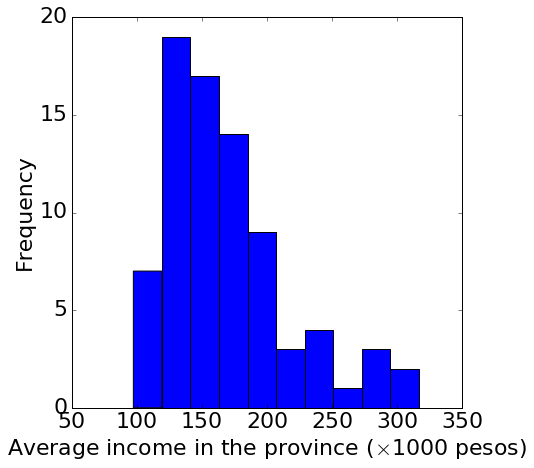

In [6]:
df.gdp_pc_pp.plot.hist(figsize=(7,7))
plt.xlabel("Average income in the province ($\\times$1000 pesos)");

And below is a scatter plot showing average income, poverty incidence, and size (population) of each province

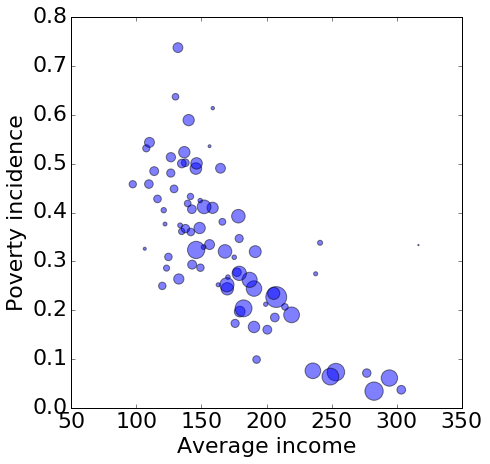

In [7]:
df.plot.scatter(x="gdp_pc_pp", y="pov_head", s=df["pop"]/1e4, alpha=0.5, figsize=(7,7))
plt.xlabel("Average income")
plt.ylabel("Poverty incidence")
plt.ylim(0);

# Computing socio-economic capacity

Now that we have minimum familiarity with dataframes, let us use the resilience model. Let us first read the function definitions, from [res_ind_lib.py](res_ind_lib.py)

In [8]:
from res_ind_lib import *     #MAIN library: the functions used to compute risk, resilience, etc

Before running the model, for technical reasons, we need to define "reference" values for some variables. The following function does it.

<small>(The technical reason is that within the function that computes resilience, some variables -- exposure fa, exposure bias pe, and poverty headcount pov_head -- are used to compute the vulnerabilities of poor and nonpoor people (vp, vr) from average vulnerability and vulnerability bias (v, pv). Making copies of this variables now, faref=fa, peref=pe, etc., ensures that policy experiments that modify these variables, for instance exposure bias, leaves vp and vr unchanged).</small>

In [9]:
df = def_ref_values(df).dropna()
df[["fa", "faref"]].head()

,fa,faref
variable,,
Abra,0.1641,0.1641
Agusan Del Norte,0.3180,0.3180
Agusan Del Sur,0.1146,0.1146
Apayao,0.0040,0.0040
Batangas,0.0023,0.0023


In [10]:
df = def_ref_values(df).dropna()
df[["fa", "faref"]].head()

,fa,faref
variable,,
Abra,0.1641,0.1641
Agusan Del Norte,0.3180,0.3180
Agusan Del Sur,0.1146,0.1146
Apayao,0.0040,0.0040
Batangas,0.0023,0.0023


#### Central cases

In [11]:
df_with_results=compute_resiliences(df)


print("nb Provinces with all data :"+str(df.dropna().shape[0]))
nb_countries_all_results = df_with_results["resilience"].dropna().shape[0]
print("nb Provinces with all data and results :"+str(nb_countries_all_results))

df_with_results.to_csv("all_data_and_results.csv")


nb Provinces with all data :35
nb Provinces with all data and results :35


#### Basic reporting

Resilience averages 82% across our sample, ranging from 35% to 200%


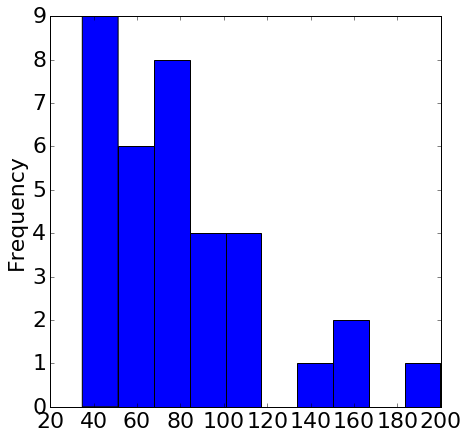

In [12]:
#Some stats
a=df_with_results.resilience;
a.min()*100,a.mean()*100,a.max()*100
print("Resilience averages {mean:.0%} across our sample, ranging from {min:.0%} to {max:.0%}".format(
    min=a.min(),mean=a.mean(),max=a.max()))
(100*a).plot.hist(figsize=(7,7));

In [13]:
#Outputs table with main results
to_output = ['gdp_pc_pp', 'pop',"protection","fa","v","resilience","risk"]
a=df_with_results[to_output].copy()
a.loc[:,["fa","v","resilience","risk"]]=100*a[["fa","v","resilience","risk"]]
desc=pd.read_csv("inputs/inputs_info.csv").set_index('key')["descriptor"]
a=a.rename(columns=desc).dropna()
a.to_excel("main results.xlsx")
a.head()

,Average income in the province,Population,Hazard (protection),Exposure,Vulnerability without early warning,Socio-economic capacity,Risk to well-being
variable,,,,,,,
Abra,133.688,240135.244121,10.57,16.41,12.354276,56.448776,1.050301
Agusan Del Norte,179.014,661728.454375,9.41,31.80,19.024653,71.155485,2.712576
Agusan Del Sur,126.492,677779.682154,8.61,11.46,19.327489,46.260188,1.429448
Apayao,158.732,116022.676390,6.51,0.40,11.428096,49.966928,0.035058
Batangas,219.272,2485002.055465,7.73,0.23,13.534097,115.140107,0.011151


# Categorizing provinces

In [14]:
categories = pd.DataFrame([make_tiers(df_with_results.resilience), make_tiers(df_with_results.risk)]).T.dropna()
categories_to_formated_excel_file(categories,"categories.xlsx")
categories.head()

,resilience,risk
Abra,Low,High
Agusan Del Norte,Mid,High
Agusan Del Sur,Low,High
Apayao,Low,Low
Batangas,High,Low


Risk to assets, socio-economic capacity, and total welfare risk can also be visualized in maps (see [draw_maps.ipynb](draw_maps.ipynb) for how to build these maps)

#### Mapping the results

 <table border="0" style="border:none">
  <tr>
    <td>![title](img/map_and_legend_of_asset_risk.png)</td>
    <td>![title](img/map_and_legend_of_se_capacity.png)</td>
    <td>![title](img/map_and_legend_of_welfare_risk.png)</td>
  </tr>
</table> 


# Policy experiments

#### Impact of decreasing poverty incidence

In [15]:
df_share1 = compute_resiliences( df.dropna().assign(pov_head=df.pov_head-1/100) )

#welfare losses
wa=df_with_results.total_equivalent_cost.sum()*1e-9
wb=df_share1.total_equivalent_cost.sum()*1e-9

#asset losses
ka = (df_with_results.dKtot/df.protection).sum()*1e-9
kb = (df_share1.dKtot/df_share1.protection).sum()*1e-9

print(" Decreasing poverty incidence by 1 percent in the {nb} provincies \
would increase asset losses from USD {ka:0.0f} to {kb:0.0f} billions per year \
(+{XX:.1f} percent), but reduce welfare losses by {YY:.2} percent".format(
        XX=100*(kb-ka)/ka,ka=ka,kb=kb,YY=100*(wa-wb)/wa,nb=nb_countries_all_results)
     )

 Decreasing poverty incidence by 1 percent in the 35 provincies would increase asset losses from USD 0 to 0 billions per year (+-0.2 percent), but reduce welfare losses by 1.3 percent


#### Impact of increasing effective scale up

In [16]:
df_su = compute_resiliences( df.dropna().assign(sigma_p=1) )

#welfare losses
wa=df_with_results.total_equivalent_cost.sum()*1e-6
wb=df_su.total_equivalent_cost.sum()*1e-6

#asset losses
ka = (df_with_results.dKtot/df.protection).sum()*1e-6
kb = (df_su.dKtot/df_su.protection).sum()*1e-6

print(" Increasing effective scale up to 100% in the {nb} provincies \
would increase asset losses from {ka:0.2f} to {kb:0.2f} billions per year \
(+{XX:.1f} percent), but reduce welfare losses by {YY:.2} percent".format(
        XX=100*(kb-ka)/ka,ka=ka,kb=kb,YY=100*(wa-wb)/wa,nb=nb_countries_all_results)
     )

 Increasing effective scale up to 100% in the 35 provincies would increase asset losses from 24.98 to 24.98 billions per year (+0.0 percent), but reduce welfare losses by 2.5e+01 percent
